<a href="https://colab.research.google.com/github/Abdelrahman26/Sentiment-Analysis-Of-Arabic_Tweets/blob/main/DL_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import sklearn 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=pd.read_csv('/content/preprocessed_data.csv')  

In [ ]:
df.info()

# TF IDF


In [ ]:
# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['tweet'][:]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())

# Count Vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['tweet'])

In [ ]:
X

# Long Short Term Memory (LSTM)


In [ ]:
df.head()

## Converting Labels to numbers

In [ ]:
from sklearn import preprocessing
pro = preprocessing.LabelEncoder()
df['dialect'].replace({-1: 18}, inplace=True)
encpro = pro.fit_transform(df['dialect'])
df['dialect'] = encpro

In [ ]:
X=df['tweet'].values
y=df['dialect'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.050)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 8550
Test Data: 450


In [ ]:
len(np.unique(y))

18

In [ ]:
lst_accent = []
lst_accent_label = []
accent_flag = {}
for i in range(len(y)):
  if y[i] not in accent_flag:
    accent_flag[y[i]] = i
    lst_accent_label.append(y[i])

In [ ]:
lst_accent_label

In [ ]:
d = pd.read_csv('/content/new_datax.csv')

In [ ]:
label_dict = {}
idx = 0
for id in d['dialect']:
    if id not in label_dict:
      label_dict[id] =  lst_accent_label[idx]
      idx += 1

In [ ]:
label_dict

In [ ]:
X

array([' بالنهاية ينتفض يغير',
       'يعني  محسوب  البشر حيونه ووحشيه وتطلبون  الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب',
       'مبين  كلامه خليجي', ...,
       ' وين إحنا ندش  الجو دام جذي أهم شي نبي رقم  حسين بليز عشان نجرب أكلها',
       'لطيفة شلونج شخبارج شلون صحتج عساج مرتاحة شنو اليديد شعلومج  شلون الدوام',
       'الأغنية غرندايزر أظن نص اللي  تويتر  يعرفونه'], dtype=object)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
max_features=10000
#which is set to 10000. This is because when you convert words to numbers using the bag of words approach, 
#all the unique words in all the documents are converted into features. 
#All the documents can contain tens of thousands of unique words.
#But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. 
#Therefore we set the max_features parameter to 10000, which means that we want to use 10000 most occurring words as features for training our classifier.
max_text_length=20


x_tokenizer=Tokenizer(max_features)

In [ ]:
x_tokenizer.fit_on_texts(X)
word_index = x_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 36592 unique tokens.


In [ ]:
X

array([' بالنهاية ينتفض يغير',
       'يعني  محسوب  البشر حيونه ووحشيه وتطلبون  الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب',
       'مبين  كلامه خليجي', ...,
       ' وين إحنا ندش  الجو دام جذي أهم شي نبي رقم  حسين بليز عشان نجرب أكلها',
       'لطيفة شلونج شخبارج شلون صحتج عساج مرتاحة شنو اليديد شعلومج  شلون الدوام',
       'الأغنية غرندايزر أظن نص اللي  تويتر  يعرفونه'], dtype=object)

In [ ]:
word_index['نص']

374

In [ ]:
import collections
print('Top 5 most common words are:', collections.Counter(x_tokenizer.word_counts).most_common(5))

Top 5 most common words are: [('الله', 1203), ('اللي', 1126), ('انا', 617), ('والله', 581), ('مش', 498)]


In [ ]:
#text to numbers
#return each text by sequence of integers ,each integer be the index of token in dictionary
x_train=x_tokenizer.texts_to_sequences(X_train) 
x_train_val=sequence.pad_sequences(x_train,padding='post',maxlen=max_text_length)
x_test=x_tokenizer.texts_to_sequences(X_test) 
x_test_val=sequence.pad_sequences(x_test,padding='post',maxlen=max_text_length)

In [ ]:
x_train_val[0]

array([2500,  116,    2,  229,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
x_train[0]

[2500, 116, 2, 229]

In [ ]:
X_train[19]

'سامر سامر فاهم عليكك انا  انت مش فاهم علي المسلسل كلو تطعميات ومقاطع بتخزي الاشياء اللي بتسير بالبلد  بتسير  العلن وكل  حر بحالو مش تيجي تنعرض قدام الناس كلهاا مش فاهم انا  انت بتناقش  مبدأ غلط'

In [ ]:
x_train_val[19]

array([4122,    2, 5722, 5743, 5722, 9087,   74,  838,    5, 3202,  664,
         17, 3197,    5,  536,    3,    8, 4152, 4633,  169], dtype=int32)

In [ ]:
x_train_val.shape

(8550, 20)

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM,Embedding
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D ,Dropout
maxlen=max_text_length
embedding_dim=1000
model=Sequential()
model.add(layers.Embedding(input_dim=max_features,
         output_dim=embedding_dim,
         input_length=maxlen))

model.add(layers.LSTM(1000))
model.add(layers.Dropout(0.8))


model.add(layers.Dense(18, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 1000)          10000000  
                                                                 
 lstm (LSTM)                 (None, 1000)              8004000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 18)                18018     
                                                                 
Total params: 18,022,018
Trainable params: 18,022,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train_val,y_train, epochs=60, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/60
241/241 [==============================] - 13s 29ms/step - loss: 2.7812 - accuracy: 0.1099 - val_loss: 2.6384 - val_accuracy: 0.1649
Epoch 2/60
241/241 [==============================] - 6s 24ms/step - loss: 2.3267 - accuracy: 0.2438 - val_loss: 2.1659 - val_accuracy: 0.2982
Epoch 3/60
241/241 [==============================] - 6s 25ms/step - loss: 1.7039 - accuracy: 0.4493 - val_loss: 2.0567 - val_accuracy: 0.3813
Epoch 4/60
241/241 [==============================] - 5s 23ms/step - loss: 1.1652 - accuracy: 0.6416 - val_loss: 1.9995 - val_accuracy: 0.4199
Epoch 5/60
241/241 [==============================] - 5s 20ms/step - loss: 0.7284 - accuracy: 0.7892 - val_loss: 2.0781 - val_accuracy: 0.4351
Epoch 6/60
241/241 [==============================] - 5s 20ms/step - loss: 0.4824 - accuracy: 0.8650 - val_loss: 2.3868 - val_accuracy: 0.4444
Epoch 7/60
241/241 [==============================] - 5s 21ms/step - loss: 0.3325 - accuracy: 0.9089 - val_loss: 2.5967 - val_accuracy: 0.429

In [ ]:
scores,accuracy = model.evaluate(x_test_val, y_test)
print('Score:',scores)
print('Accuracy:',accuracy)

15/15 [==============================] - 0s 9ms/step - loss: 4.9260 - accuracy: 0.4222
Score: 4.925956726074219
Accuracy: 0.42222222685813904


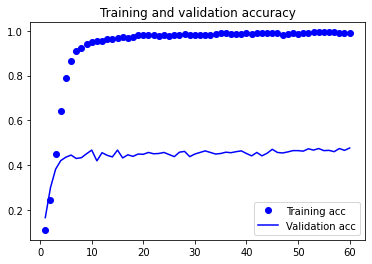

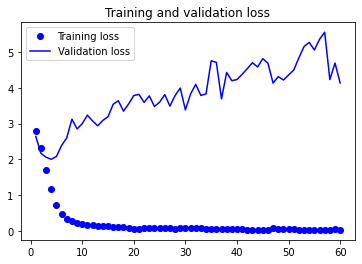

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Saving and Using The Model LSTM
## Long Short Term Memory 

In [ ]:
from keras.models import load_model
model.save('lstm.h5') 